In [1]:
import tensorflow as tf
#import tensorflow.contrib.learn.python.learn as learn
import tflearn 
import scipy as sp
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import random
%matplotlib inline

# Import and process data

In [2]:
def importMNIST(filename):
    """
    Import MNIST data from a csv file.
    Separate labels and data.
    """
    MNIST_raw = np.genfromtxt(filename, delimiter=",")
    MNIST_labels = np.zeros(10000)
    MNIST_data = []
    
    for i in np.arange(0, MNIST_raw.shape[0], 1):
        MNIST_labels[i] = MNIST_raw[i,0]
        MNIST_data.append(MNIST_raw[i,1:])
        
    return MNIST_labels, MNIST_data

def processLabels(MNIST_labels):
    """
    One-hot encoding for the MNIST labels.
    """
    # Convert label data to one-hot array
    MNIST_labelsOH = np.zeros((10000,10))
    MNIST_labelsOH[np.arange(10000), MNIST_labels.astype(np.int)] = 1
    MNIST_labelsLst = []
    for i in np.arange(0, MNIST_labelsOH.shape[0], 1):
        MNIST_labelsLst.append(MNIST_labelsOH[i])
    
    return MNIST_labelsLst

In [3]:
MNIST_labels, MNIST_data = importMNIST("./inData/mnist_test.csv")
MNIST_labelsOH = processLabels(MNIST_labels)
MNIST_dataRS = np.reshape(MNIST_data, [10000, 784, 1])

8421 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.] 7.0


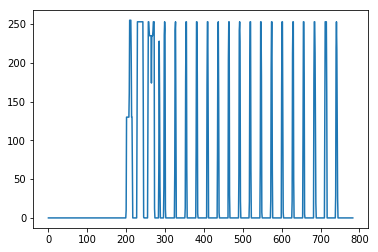

In [4]:
rand0 = random.randint(0,9999)
print(rand0, MNIST_labelsOH[rand0], MNIST_labels[rand0])
plt.plot(MNIST_data[rand0])

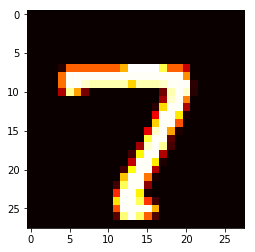

In [5]:
MNIST_dataTest = np.reshape(MNIST_data[rand0],[28,28])
plt.imshow(MNIST_dataTest, cmap='hot', interpolation='nearest')

# Neural Network

In [13]:
sess = tf.InteractiveSession()
tf.reset_default_graph()
tflearn.initializations.normal()

# Input layer:
net = tflearn.layers.core.input_data(shape=[None, 784, 1])

# First layer:
net = tflearn.layers.conv.conv_1d(net, 32, 6, activation="relu")
net = tflearn.layers.conv.max_pool_1d(net, 2)

# Second layer:
net = tflearn.layers.conv.conv_1d(net, 64, 6, activation="relu")
net = tflearn.layers.conv.max_pool_1d(net, 2)

# Fully connected layer 1:
net = tflearn.layers.core.fully_connected(net, 1024, activation="relu")

# Fully connected layer 2:
# net = tflearn.layers.core.fully_connected(net, 256, activation="relu")

# Output layer:
net = tflearn.layers.core.fully_connected(net, 10, activation="softmax")

net = tflearn.layers.estimator.regression(net, optimizer='adam', loss='categorical_crossentropy',\
                         learning_rate=0.00001)

In [14]:
model = tflearn.DNN(net, tensorboard_verbose=3)
model.fit(MNIST_dataRS, MNIST_labelsOH, show_metric=True)

Training Step: 605  | total loss: 7.75624
| Adam | epoch: 003 | loss: 7.75624 - acc: 0.6516 -- iter: 08576/10000


KeyboardInterrupt: 